**Text Features**

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

In [41]:
an_df = pd.read_csv(r"C:\Users\user\Desktop\MLPC\annotations.csv")
an_df.head(2)

,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3


In [42]:
an_em = np.load(r"C:\Users\user\Desktop\MLPC\annotations_text_embeddings.npz")["embeddings"]

In [74]:
s= StandardScaler()
scaled_text_features= s.fit_transform(an_em)
pca=KernelPCA(n_components=2, kernel="rbf")
downp = pca.fit_transform(scaled_text_features)

<Axes: >

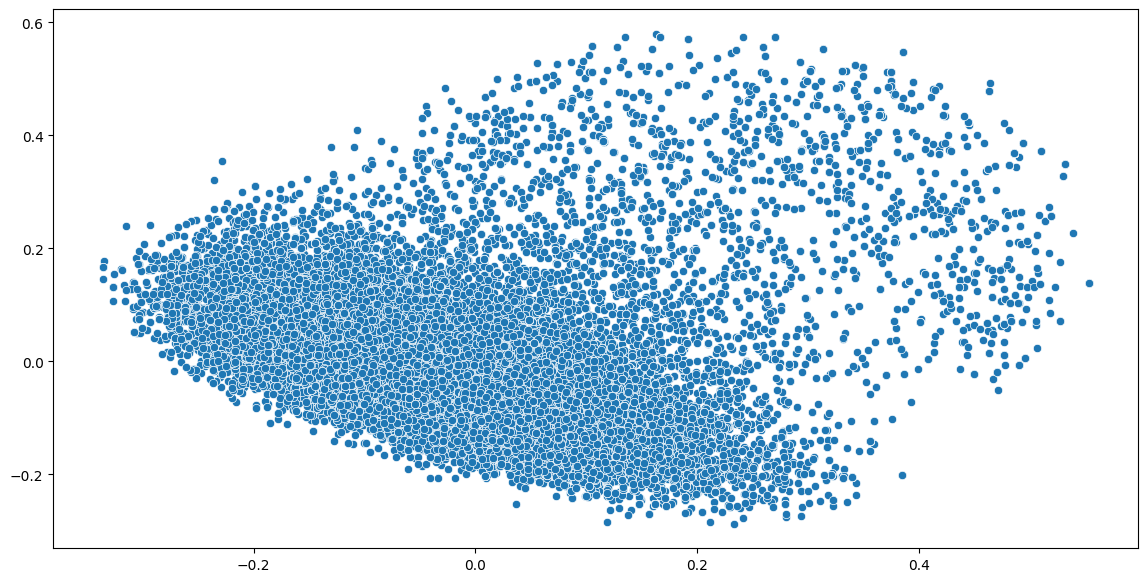

In [80]:
fig,ax = plt.subplots(figsize=(14,7))
sns.scatterplot(x=downp[:,0],y=downp[:,1],ax=ax)

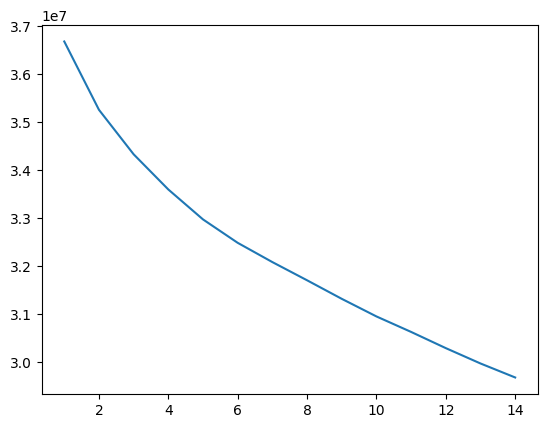

In [91]:
# finding appropriate number of clusters
inertia = []
k_range=range(1,15)
for k in k_range:
    kmeans=KMeans(k,random_state=1234, n_init=14)
    kmeans.fit(scaled_text_features)
    inertia.append(kmeans.inertia_)
plt.plot(k_range,inertia)

In [100]:
s= StandardScaler()
scaled_text_features= s.fit_transform(an_em)
kmeans = KMeans(4)
an_df["cluster"] = kmeans.fit_predict(scaled_text_features)
an_df["pc1"] = downp[:,0]
an_df["pc2"] = downp[:,1]

<Axes: xlabel='pc1', ylabel='pc2'>

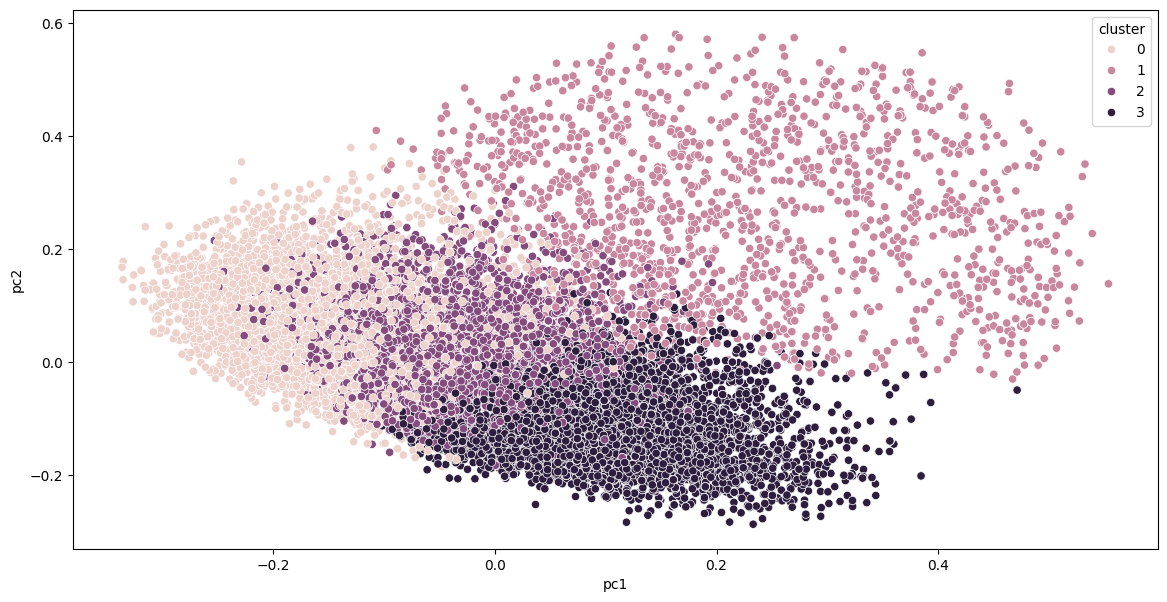

In [101]:
fig,ax= plt.subplots(1,figsize=(14,7))
sns.scatterplot(data=an_df,x="pc1",y="pc2",hue="cluster",ax=ax)


In [104]:
cluster_stats = an_df.groupby('cluster').agg({
    'pc1': ['mean', 'min', 'max', 'count'],
    'pc2': ['mean', 'min', 'max']
})
print(cluster_stats)

              pc1                                  pc2                    
             mean       min       max  count      mean       min       max
cluster                                                                   
0       -0.131861 -0.336398  0.125159   8622  0.052993 -0.185455  0.380293
1        0.254369 -0.107036  0.553704   2884  0.268365 -0.030372  0.579747
2       -0.041443 -0.264257  0.254590  12312  0.004303 -0.183079  0.310443
3        0.076078 -0.103833  0.471272  12008 -0.106916 -0.287232  0.122508


In [ ]:
# answer: i would say you could end up with 3-4 meaninfull clusters what do you guys think 